# Midterm Project


## Team Members:
* Neha Nooka(OU93490)
* Rutuja Karad(QU05893)

In [582]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [583]:
!pip install textblob      #for installation

import textblob            #to import
from textblob import TextBlob

In [584]:
import warnings
warnings.filterwarnings('ignore')

In [585]:
df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/dataset_newsletter.csv')
df=df.drop(columns=['Unnamed: 0'],axis=1)

In [586]:
df.head()

,title,body,signature,submissiontime,category
0,Mrs. Laurence Class,"Because of the upcoming holiday, we will be re...",Jaslynn Laurence,11/18/15 9:26 AM,ANNOUNCEMENTS
1,Mr. Valle's Winter Break Packets (Cornell/Hamp...,"All my Cornell, Hampton, and Princeton student...",Mr. Sam Valle,12/16/15 9:26 PM,ANNOUNCEMENTS
2,Hours of Operation,"Parents/Guardians, We will gladly assist yo...",Ms. Ellis,11/18/15 3:30 PM,ANNOUNCEMENTS
3,Character Education,CMIT South scholars will continue to work on v...,Ch.Ed. Team Room 163,11/15/15 4:49 PM,ANNOUNCEMENTS
4,CMIT Students Connecting with Students Around ...,A couple of classes have had the opportunity t...,Srta. Dickerson,11/16/15 5:21 AM,ANNOUNCEMENTS


In [587]:
df.dtypes

title             object
body              object
signature         object
submissiontime    object
category          object
dtype: object

In [588]:
df['submissiontime'] = pd.to_datetime(df['submissiontime'])

In [589]:
df.dtypes

title                     object
body                      object
signature                 object
submissiontime    datetime64[ns]
category                  object
dtype: object

In [590]:
df.isna().sum()

title              10
body                3
signature         400
submissiontime      0
category            0
dtype: int64

In [591]:
df.fillna('None',inplace=True)

In [592]:
df.size

98035

In [593]:
df['Date'] = pd.to_datetime(df['submissiontime']).dt.date
df['Time'] = pd.to_datetime(df['submissiontime']).dt.time
df['Day'] = pd.to_datetime(df['submissiontime']).dt.weekday
df['Hour'] = pd.to_datetime(df['submissiontime']).dt.hour

In [594]:
df.head()

,title,body,signature,submissiontime,category,Date,Time,Day,Hour
0,Mrs. Laurence Class,"Because of the upcoming holiday, we will be re...",Jaslynn Laurence,2015-11-18 09:26:00,ANNOUNCEMENTS,2015-11-18,09:26:00,2,9
1,Mr. Valle's Winter Break Packets (Cornell/Hamp...,"All my Cornell, Hampton, and Princeton student...",Mr. Sam Valle,2015-12-16 21:26:00,ANNOUNCEMENTS,2015-12-16,21:26:00,2,21
2,Hours of Operation,"Parents/Guardians, We will gladly assist yo...",Ms. Ellis,2015-11-18 15:30:00,ANNOUNCEMENTS,2015-11-18,15:30:00,2,15
3,Character Education,CMIT South scholars will continue to work on v...,Ch.Ed. Team Room 163,2015-11-15 16:49:00,ANNOUNCEMENTS,2015-11-15,16:49:00,6,16
4,CMIT Students Connecting with Students Around ...,A couple of classes have had the opportunity t...,Srta. Dickerson,2015-11-16 05:21:00,ANNOUNCEMENTS,2015-11-16,05:21:00,0,5


In [595]:
df.nunique()

title             12359
body              16359
signature          2845
submissiontime    17778
category             12
Date               1935
Time               1309
Day                   7
Hour                 24
dtype: int64

In [596]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19607 entries, 0 to 19606
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           19607 non-null  object        
 1   body            19607 non-null  object        
 2   signature       19607 non-null  object        
 3   submissiontime  19607 non-null  datetime64[ns]
 4   category        19607 non-null  object        
 5   Date            19607 non-null  object        
 6   Time            19607 non-null  object        
 7   Day             19607 non-null  int64         
 8   Hour            19607 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 1.3+ MB


In [597]:
df.describe()

,Day,Hour
count,19607.000000,19607.000000
mean,3.325904,13.031009
std,1.408096,4.439416
min,0.000000,0.000000
25%,3.000000,10.000000
50%,4.000000,13.000000
75%,4.000000,16.000000
max,6.000000,23.000000


In [598]:
df.category.value_counts()

ANNOUNCEMENTS        10240
BREAKING NEWS         3649
UPCOMING EVENTS       3055
PTO                   1507
IMPORTANT NEWS         452
CLUBS                  363
ATHLETICS              170
DONATIONS NEEDED        63
FIELD TRIPS             53
VOLUNTEERS NEEDED       27
ACHIEVEMENTS            25
STUDENT THOUGHTS         3
Name: category, dtype: int64

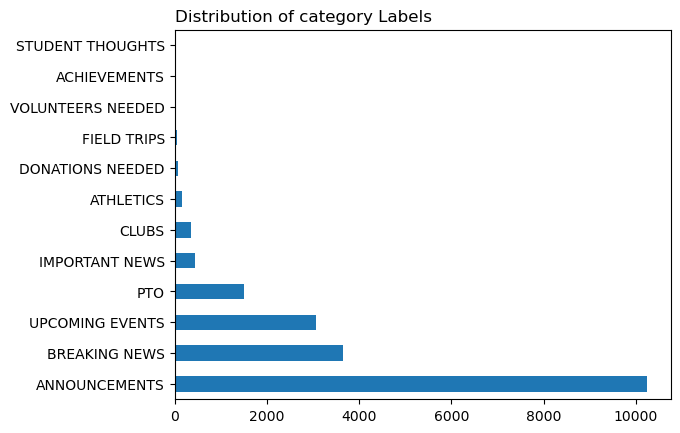

In [599]:
df['category'].value_counts().plot.barh()
plt.title('Distribution of category Labels', loc='left')
plt.show()

In [600]:
counts = df['category'].value_counts()
counts / counts.sum()

ANNOUNCEMENTS        0.522262
BREAKING NEWS        0.186107
UPCOMING EVENTS      0.155812
PTO                  0.076860
IMPORTANT NEWS       0.023053
CLUBS                0.018514
ATHLETICS            0.008670
DONATIONS NEEDED     0.003213
FIELD TRIPS          0.002703
VOLUNTEERS NEEDED    0.001377
ACHIEVEMENTS         0.001275
STUDENT THOUGHTS     0.000153
Name: category, dtype: float64

In [601]:
df.columns

Index(['title', 'body', 'signature', 'submissiontime', 'category', 'Date',
       'Time', 'Day', 'Hour'],
      dtype='object')

In [602]:
import nltk
nltk.download('all')
# create a list text
text = list(df['body'])

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/nehanooka/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/nehanooka/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/nehanooka/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/nehanooka/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/nehanooka/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Down

[nltk_data]    |   Package omw-1.4 is already up-to-date!
[nltk_data]    | Downloading package opinion_lexicon to
[nltk_data]    |     /Users/nehanooka/nltk_data...
[nltk_data]    |   Package opinion_lexicon is already up-to-date!
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     /Users/nehanooka/nltk_data...
[nltk_data]    |   Package panlex_swadesh is already up-to-date!
[nltk_data]    | Downloading package paradigms to
[nltk_data]    |     /Users/nehanooka/nltk_data...
[nltk_data]    |   Package paradigms is already up-to-date!
[nltk_data]    | Downloading package pe08 to
[nltk_data]    |     /Users/nehanooka/nltk_data...
[nltk_data]    |   Package pe08 is already up-to-date!
[nltk_data]    | Downloading package perluniprops to
[nltk_data]    |     /Users/nehanooka/nltk_data...
[nltk_data]    |   Package perluniprops is already up-to-date!
[nltk_data]    | Downloading package pil to
[nltk_data]    |     /Users/nehanooka/nltk_data...
[nltk_data]    |   Packa

[nltk_data]    |   Package word2vec_sample is already up-to-date!
[nltk_data]    | Downloading package wordnet to
[nltk_data]    |     /Users/nehanooka/nltk_data...
[nltk_data]    |   Package wordnet is already up-to-date!
[nltk_data]    | Downloading package wordnet2021 to
[nltk_data]    |     /Users/nehanooka/nltk_data...
[nltk_data]    |   Package wordnet2021 is already up-to-date!
[nltk_data]    | Downloading package wordnet2022 to
[nltk_data]    |     /Users/nehanooka/nltk_data...
[nltk_data]    |   Package wordnet2022 is already up-to-date!
[nltk_data]    | Downloading package wordnet31 to
[nltk_data]    |     /Users/nehanooka/nltk_data...
[nltk_data]    |   Package wordnet31 is already up-to-date!
[nltk_data]    | Downloading package wordnet_ic to
[nltk_data]    |     /Users/nehanooka/nltk_data...
[nltk_data]    |   Package wordnet_ic is already up-to-date!
[nltk_data]    | Downloading package words to
[nltk_data]    |     /Users/nehanooka/nltk_data...
[nltk_data]    |   Package

## Removing the stop words

In [ ]:
import re

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

corpus = []

for i in range(len(text)):

    r = re.sub('[^a-zA-Z]', ' ', str(text[i]))

    r = r.lower()

    r = r.split()

    r = [word for word in r if word not in stopwords.words('english')]

    r = [lemmatizer.lemmatize(word) for word in r]

    r = ' '.join(r)

    corpus.append(r)


df['body1'] = corpus

df.head()

In [ ]:
df['polarity'] = df['body1'].map(lambda text: TextBlob(text).sentiment.polarity)

In [ ]:
df['word_count'] = df['body'].apply(lambda x: len(str(x).split()))

In [ ]:
df.head(2)

In [ ]:
df.polarity.min()

In [ ]:
df.polarity.max()

In [ ]:
print('5 random body with the highest positive sentiment polarity: \n')
cl = df.loc[df.polarity == 1, ['body']].sample(5).values
for c in cl:
    print(c[0])

In [ ]:
print('5 random body with the most neutral sentiment(zero) polarity: \n')
cl = df.loc[df.polarity == 0, ['body']].sample(5).values
for c in cl:
    print(c[0])

In [ ]:
!pip install cufflinks --upgrade
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


In [ ]:
df['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

## Most of the body are positive. Very few are negative.

In [ ]:
df['word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    title='Word Count Distribution')

## Most of the body length is between 50-99 words

In [ ]:
df['Day'].iplot(
    kind='hist',
    xTitle='Day',
    linecolor='black',
    yTitle='count',
    title='Review Day Distribution')
#0-Mon 1-Tue 2-Wed 3-Thu 4-Fri 5-Sat 6-Sun

## Most of the news were published on Friday and least were published on Sunday, Monday and Tuesday.

In [ ]:
df['Hour'].iplot(
    kind='hist',
    xTitle='Hour',
    linecolor='black',
    yTitle='count',
    title='Review Hour Distribution')

## Most of the news were published at 10 a.m and 1 and 2 pm. And the least were published around the midnight.

## Top unigrams before removing stop words


In [ ]:
df['body'] = df['body'].fillna('N/A')

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['body'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['body' , 'count'])

In [ ]:
df1.groupby('body').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 unigrams in body before removing stop words')

## Top unigrams after removing stop words


In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['body1'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['body1' , 'count'])

In [ ]:
df2.groupby('body1').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in body after removing stop words')

## Top bigrams before removing stop words

In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['body'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['body' , 'count'])

In [ ]:
df3.groupby('body').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in body after removing stop words')

## Top bigrams after removing stop words

In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['body1'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['body1' , 'count'])

In [ ]:
df4.groupby('body1').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in body after removing stop words')

## Top trigrams before removing stop words

In [ ]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['body'], 20)
for word, freq in common_words:
    print(word, freq)
df5 = pd.DataFrame(common_words, columns = ['body' , 'count'])

In [ ]:
df5.groupby('body').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in body before removing stop words')

## Top trigrams after removing stop words

In [ ]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['body1'], 20)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['body1' , 'count'])

In [ ]:
df6.groupby('body1').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in body after removing stop words')

## Splitting the data into train and test

In [ ]:
df.columns

In [ ]:
import datetime as dt
df['submittime']=df['submissiontime'].map(dt.datetime.toordinal)

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['title', 'body1', 'signature', 'submittime']]
y = df['category']


In [ ]:
# Splitting the train and test values
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=124)
print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')

In [ ]:
# Identifying columns into Numerical and Categorical features
numerical_features = ['submittime']
categorical_features = ['title','body1', 'signature']

In [ ]:
# Importing required Pipelining packages
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Defining and Pipelining Numerical Features
num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])

In [ ]:
# Defining and Pipelining Categorical Features
cat_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
# Applying the pipelining and transforming both Numeric and Categorical features
processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, numerical_features),
                                                      ('create_dummies', cat_pipeline, categorical_features)])
print(processing_pipeline)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

### Logistic Regression

In [ ]:
# Applying Logistic regression
from sklearn.linear_model import LogisticRegression
logical_reg_model = LogisticRegression()
model1 = Pipeline([('preprocess', processing_pipeline),
                          ('classifier', logical_reg_model)])

model1.fit(X_train, y_train)

In [ ]:
predictions = model1.predict(X_test)

In [ ]:
# Model Evaluation
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score,recall_score

print("Test accuracy:", accuracy_score(y_test, predictions))
print("F1 Score:", f1_score(y_test, predictions, average='weighted'))
print("Test Precision:", precision_score(y_test, predictions, average='weighted'))
print("Test Recall:", recall_score(y_test, predictions, average='weighted'))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

### Decision Tree

In [ ]:
# Applying Desicion Tree
from sklearn import tree
dec_tree_model = tree.DecisionTreeClassifier()
model2 = Pipeline([('preprocess', processing_pipeline),
                          ('classifier', dec_tree_model)])
# Fitting the Desicion Tree
model2.fit(X_train, y_train)

In [ ]:
predictions2 = model2.predict(X_test)

In [ ]:
# Model Evaluation
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score,recall_score

print("Test accuracy:", accuracy_score(y_test, predictions2))
print("F1 Score:", f1_score(y_test, predictions2, average='weighted'))
print("Test Precision:", precision_score(y_test, predictions2, average='weighted'))
print("Test Recall:", recall_score(y_test, predictions2, average='weighted'))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions2))

### Random Forest

In [ ]:
# Applying the RandomForest
from sklearn.ensemble import RandomForestClassifier
rand_model = RandomForestClassifier(n_estimators=20)
model3 = Pipeline([('preprocess', processing_pipeline),
                          ('classifier', rand_model)])
# fitting the Random Forest
model3.fit(X_train, y_train)

In [ ]:
predictions3 = model3.predict(X_test)

In [ ]:
# Model Evaluation
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score,recall_score

print("Test accuracy:", accuracy_score(y_test, predictions3))
print("F1 Score:", f1_score(y_test, predictions3, average='weighted'))
print("Test Precision:", precision_score(y_test, predictions3, average='weighted'))
print("Test Recall:", recall_score(y_test, predictions3, average='weighted'))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions3))

### Applying Grid Search to the best performed model (Here, the best performed model is Random Forest)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
}

# Define the GridSearchCV object
k_folds = KFold(n_splits = 5)
grid_search = GridSearchCV(model3, param_grid=param_grid, cv=k_folds)

# Fit the GridSearchCV object on the training data
gcv_results=grid_search.fit(X_train, y_train)

print(gcv_results)


In [ ]:
gcv_results.best_estimator_

In [ ]:
gcv_results.best_params_

In [ ]:
gcv_results.best_score_

## After using Grid Search on Random Forest, the best score is 72%.

# Summary

- There are 12 target categories in the output variable. Out of which Announcements contain 52% of that.
- Most of the polarity is -0.025 and majority of them are positive.
- The average word count is around 50-99 words.
- Most of the news is published on Friday and least on Monday.
- Most of the news were announced at 10 a.m and least around midnight.
- The accuracy of Logistic Regression is 73, Decision Tree is 74 and Random Forest is 75.
- After using Hyperparameter tuning on Random Forest, the best score is 72.

## What have I learned

- In this Text data, I analysed human-written text for business insights. Text analysis can classify, sort, and extract information from text to identify patterns, relationships, sentiments, and other actionable knowledge. 
- The core of text analysis is training computer  to associate words with specific meanings and to understand the semantic context of unstructured data. This is similar to how humans learn a new language by associating words with objects, actions, and emotions. 
- It involves various techniques such as natural language processing, sentiment analysis, topic modeling, and text classification. Through these techniques, businesses can gain valuable insights from customer feedback, social media posts, and other unstructured data sources, which can help them improve their products, services, and marketing strategies. Text data analysis can also be used in various industries, including healthcare, finance, and education, to name a few. With the help of advanced technologies such as machine learning and artificial intelligence, text data analysis is becoming increasingly sophisticated and accurate, making it a valuable tool for decision-making in today's data-driven world.